In [ ]:
# Importação das bibliotecas usadas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Criação dos dataframes usados
df = pd.read_csv('transacoes.csv')
df2 = pd.read_csv('contas.csv')
df3 = pd.read_csv('clientes.csv')
df4 = pd.read_csv('agencias.csv')


**Introdução do PIX e seus impactos na rentabilidade do BanVic**

1. Como o PIX afetou as transações, sobretudo em volume e tipo?
2. Existem padrões sazonais ou tendências identificáveis após a implementação do PIX?

Para que a análise faça sentido, é preciso converter os dados da coluna 'data_transacao', que estão como String, em variáveis do tipo datetime, e em seguida ordená-los.


In [ ]:
# Ao fazer a conversão direta, um problema identificado foi que em alguns casos eram exibidos os milissegundos, e em outros não.
# Por isso, fiz o tratamento para que por padrão todos eles não apresentem o campo de milissegundos – importante para melhorar a visualização gráfica posteriormente.
def convert_timestamp(timestamp):
    try:
        return pd.to_datetime(timestamp, utc=True)
    except ValueError:
        return pd.to_datetime(timestamp.split('.')[0], utc=True)

df['data_transacao'] = df['data_transacao'].apply(convert_timestamp)

# Ordenação pós-conversão
df_sort = df.sort_values(by='data_transacao')

df_sort.head()

,cod_transacao,num_conta,data_transacao,nome_transacao,valor_transacao
68941,382,382,2010-02-27 16:39:46+00:00,Depósito em espécie,295.30
39800,3057,382,2010-02-27 16:59:31+00:00,Compra Crédito,-179.29
68942,6990,382,2010-03-02 12:06:59+00:00,Depósito em espécie,338.14
39801,8096,382,2010-03-02 12:11:32+00:00,Compra Crédito,-22.81
11793,8506,382,2010-03-02 13:26:48+00:00,Compra Débito,-41.55


**1. Como o PIX afetou as transações, sobretudo em volume e tipo?**

Partindo para a identificação de como o PIX afetou as transações, tanto em volume quanto em tipo, faz-se necessário passar por algumas etapas:


**1.1.Divisão Temporal:**

Divisão dos dados temporais em períodos antes e depois da introdução do PIX, possibilitando uma comparação direta dos padrões de transação em diferentes momentos.

Para isso, primeiro foram separadas todas as ocorrências de Pix em um novo dataframe. Isso é importante para entendermos quando a primeira delas aconteceu. Como resultado, temos o dia 16/11/2020. É essa a data que consideraremos a data de introdução do Pix.

In [ ]:
df_pix = df_sort[df_sort['nome_transacao'].isin(['Pix - Recebido', 'Pix - Realizado', 'Pix Saque'])]

df_pix.head()

,cod_transacao,num_conta,data_transacao,nome_transacao,valor_transacao
23798,65864,135,2020-11-16 10:54:58+00:00,Pix - Recebido,448.0
54141,35707,293,2020-11-16 13:49:52+00:00,Pix - Realizado,-330.2
64185,57667,993,2020-11-17 01:17:13+00:00,Pix - Realizado,-74.8
25515,13973,729,2020-11-17 11:31:46+00:00,Pix - Recebido,3508.4
63773,14554,729,2020-11-17 14:04:51+00:00,Pix - Realizado,-73.1


Seguindo com a análise, são criados dois dataframes que correspondem aos momentos antes e depois da introdução do Pix.

In [ ]:
data_introducao_pix = pd.to_datetime('2020-11-16 00:00:00+00:00', utc=True)

df_antes_pix = df[df['data_transacao'] < data_introducao_pix]
df_depois_pix = df[df['data_transacao'] >= data_introducao_pix]

**Período Antes da Introdução do PIX**

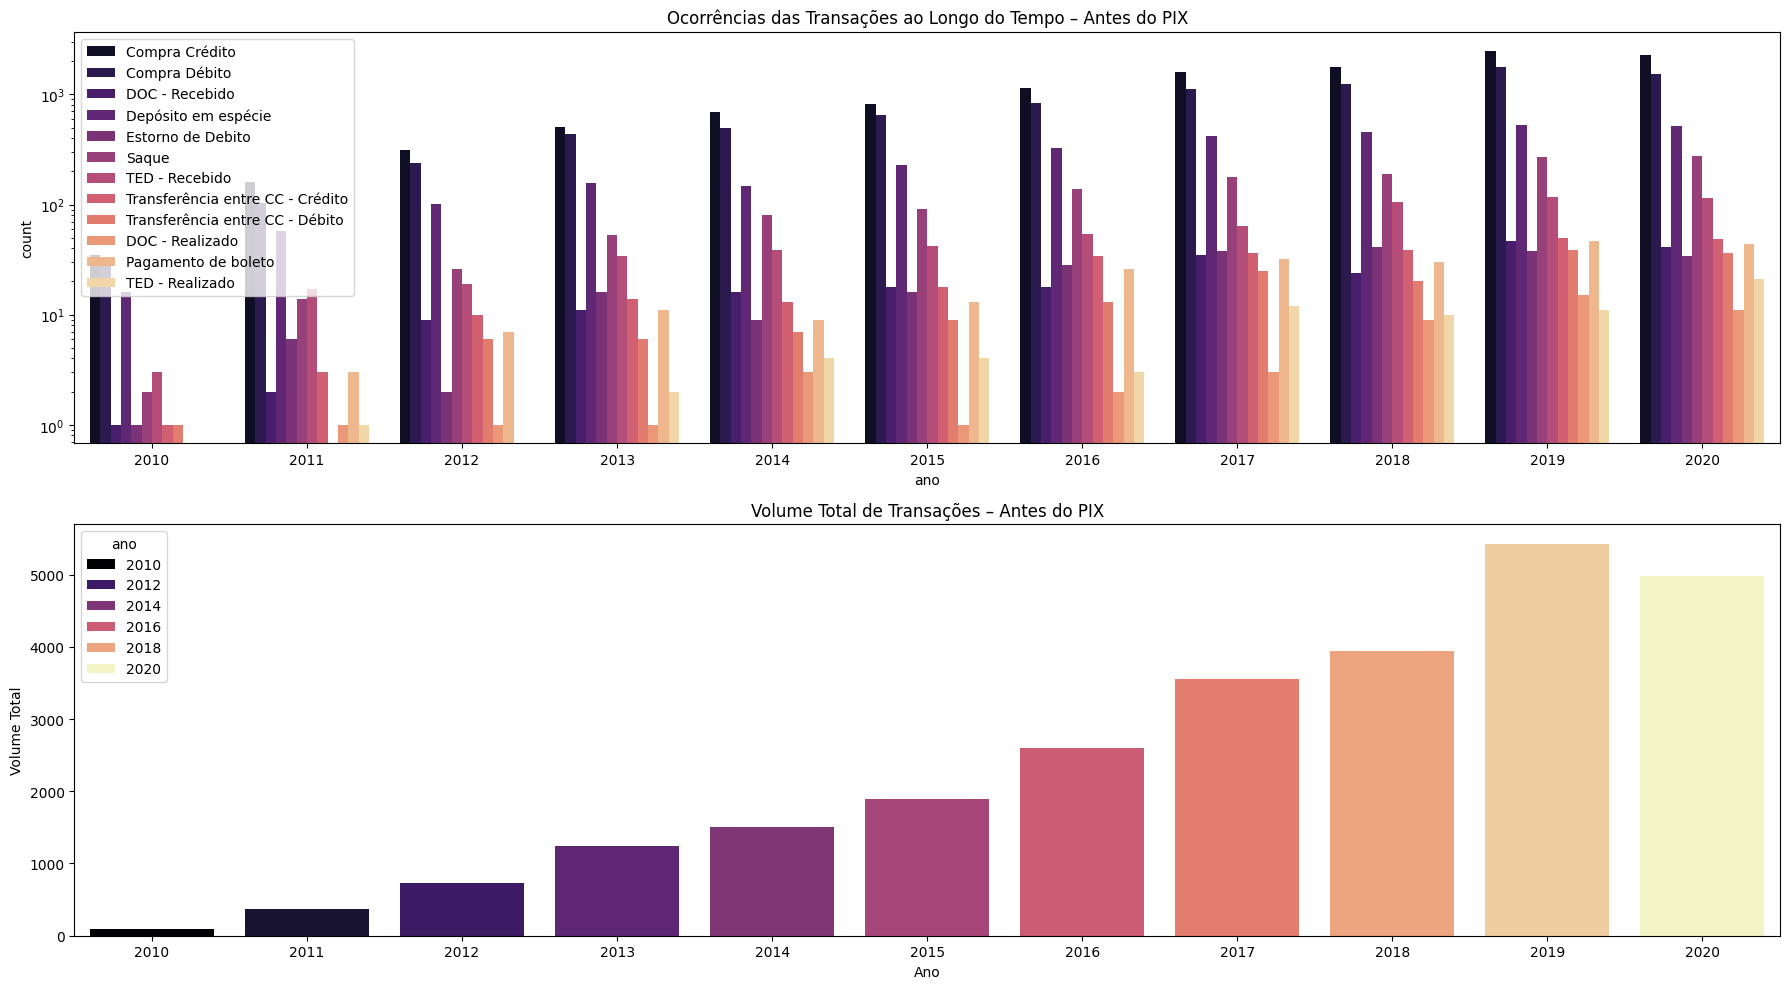

In [ ]:
# Etapas prévias: fazer uma cópia do dataframe inicial e adicionar nele uma coluna correspondente aos Anos
df_antes_pix_copy = df_antes_pix.copy()
df_antes_pix_copy['ano'] = df_antes_pix_copy['data_transacao'].dt.year
df_count_antes = df_antes_pix_copy.groupby(['ano', 'nome_transacao']).size().reset_index(name='count')

# Cálculo do volume total de transações antes da implementação
volume_antes_pix = df_antes_pix_copy.groupby('ano').size().reset_index(name='volume_total')

# Configurações do gráfico – ocorrências
fig, axs = plt.subplots(2, 1, figsize=(18, 10))

# Gráfico de barras – ocorrências
sns.barplot(data=df_count_antes, x='ano', y='count', hue='nome_transacao', palette='magma', ax=axs[0])
axs[0].set_yscale('log')
axs[0].set_title('Ocorrências das Transações ao Longo do Tempo – Antes do PIX')
axs[0].legend(loc='upper left')

# Gráfico de barras – volume total
sns.barplot(data=volume_antes_pix, x='ano', y='volume_total', hue='ano', palette='magma', ax=axs[1])
axs[1].set_title('Volume Total de Transações – Antes do PIX')
axs[1].set_ylabel('Volume Total')
axs[1].set_xlabel('Ano')

plt.tight_layout()
plt.show()


**Período Depois da Introdução do PIX**

Text(0.5, 0, 'Ano')

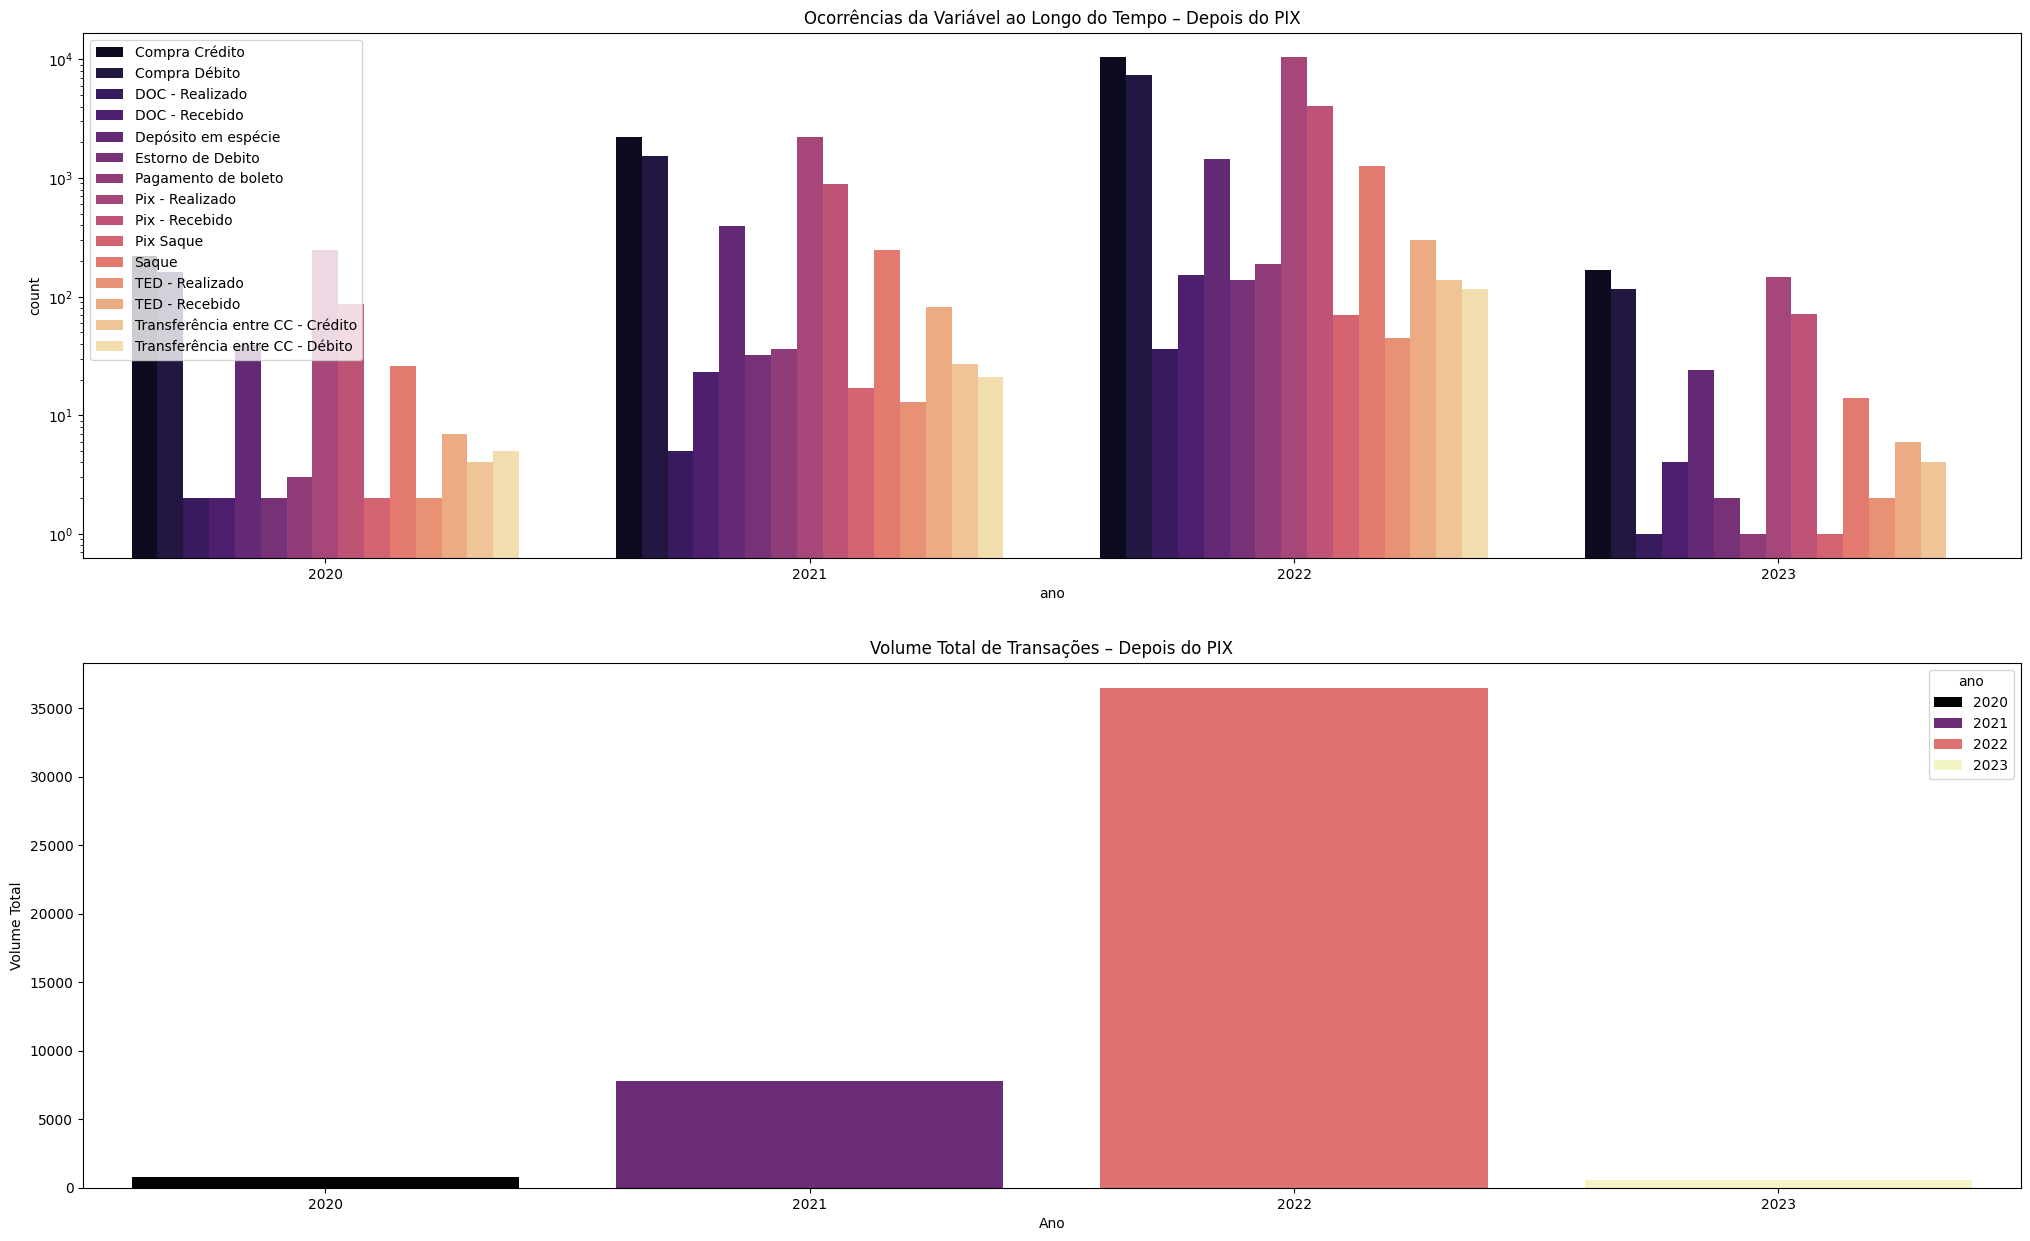

In [ ]:
# Mesmas etapas, cópia do df inicial, criação da variável Ano, e cálculo das ocorrências com base no ano
df_depois_pix_copy = df_depois_pix.copy()
df_depois_pix_copy['ano'] = df_depois_pix_copy['data_transacao'].dt.year
df_count_depois = df_depois_pix_copy.groupby(['ano', 'nome_transacao']).size().reset_index(name='count')

# Cálculo do volume total de transações após a implementação
volume_depois_pix = df_depois_pix_copy.groupby('ano').size().reset_index(name='volume_total')

# Configurações do gráfico
fig, axs = plt.subplots(2, 1, figsize=(25, 15))

# Gráfico de barras – ocorrências
sns.barplot(data=df_count_depois, x='ano', y='count', hue='nome_transacao', palette='magma', ax=axs[0])
axs[0].set_yscale('log')
axs[0].set_title('Ocorrências da Variável ao Longo do Tempo – Depois do PIX')
axs[0].legend(loc='upper left')

# Gráfico de barras – volume total
sns.barplot(data=volume_depois_pix, x='ano', y='volume_total', hue='ano', palette='magma', ax=axs[1])
axs[1].set_title('Volume Total de Transações – Depois do PIX')
axs[1].set_ylabel('Volume Total')
axs[1].set_xlabel('Ano')

**1.2. Análise de Tipos de Transações**

Considerações acerca dos tipos de transações, antes e depois da Introdução do Pix:

- No período de 2010 até novembro de 2020, notamos uma predominância marcante nas transações como compra no crédito ou débito, depósitos e saques. Ao longo desses anos, evidenciamos um crescimento constante na demanda por esses serviços, destacando sua relevância no cenário bancário para a época.

- Nos meses subsequentes, com a introdução do Pix, observamos não apenas um notável aumento na demanda, indicando uma expansão significativa da presença do BanVic na vida de mais clientes, mas também percebemos que os novos serviços foram rapidamente adotados e facilmente aceitos, com destaque especial para o curto intervalo de 16 de novembro a 31 de dezembro de 2020. Essa rápida aceitação resultou em números expressivos no encerramento do ano de 2020.

- Desde a implementação do Pix, observamos que a modalidade 'Pix - Realizado' se destaca como o serviço mais utilizado pelos usuários do BanVic em todos os períodos analisados. A compra no crédito e a compra no débito ocupam, respectivamente, as posições de segundo e terceiro lugares, evidenciando uma preferência consistente por transações comerciais. Notavelmente, o 'Pix - Recebido' agora também está presente no pódio dos serviços mais utilizados. Entretanto, o 'Pix Saque' ainda está em processo de difusão entre os clientes, embora seu uso tenha apresentado uma progressão considerável ao longo do tempo.

**1.3. Análise do Volume das Transações**

Outra análise que podemos fazer é em relação ao volume das transferências. Por isso, durante a escrita do código anterior, já adiantei tanto o cálculo (que consiste em agrupar as ocorrências por ano e armazenar o tamanho delas em um novo dataframe) quanto a representação gráfica.
A seguir, estão apresentados os valores concretos, a fim de comparar com as informações fornecidas anteriormente.

Pontos importantes a serem considerados antes das considerações:
- O período de atuação do BanVic que está sendo analisado vai de 27/02/2010 até 15/01/2023.
- O ano de 2020 está dividido em dois períodos: o antes e o depois da introdução. Por isso, na verdade, o valor total de transações ocorridas nele é 5.783.

In [ ]:
print("Volume Total de Transações Antes do PIX:")
print(volume_antes_pix)

print("\nVolume Total de Transações Depois do PIX:")
print(volume_depois_pix)

Volume Total de Transações Antes do PIX:
     ano  volume_total
0   2010            93
1   2011           367
2   2012           734
3   2013          1249
4   2014          1503
5   2015          1897
6   2016          2604
7   2017          3554
8   2018          3945
9   2019          5428
10  2020          4976

Volume Total de Transações Depois do PIX:
    ano  volume_total
0  2020           807
1  2021          7777
2  2022         36506
3  2023           559


Considerações acerca do volume total de transações, antes e depois da Introdução do Pix:
- É possível observar um crescimento consistente com aumentos significativos de um ano para o outro, tanto antes quanto após. Isso sugere uma demanda contínua pelos serviços financeiros do BanVic ao longo do tempo.
- O ano de 2022 torna-se o mais significativo por chegar à marca de 36.506 transações. Para elucidar melhor, foram cerca de 3042 transações mensais. Isso equivale, por exemplo, a aproximadamente 14 vezes o valor total de transações do ano de 2016. Um ponto que precisa ser considerado no decorrer da análise é se esse crescimento foi ou não linear.
- Um desafio, no entanto, é entender se o ano de 2023 seguiu ou não essa tendência de crescimento. Porque pode-se considerar que, em 15 dias, somente 559 transações foram feitas, então, para garantir um crescimento linear em relação aos dados do ano anterior, seria necessário aumentar em, pelo menos, 300% o número de ocorrências, e assim garantir o crescimento da demanda pelos serviços nesse ano. Além disso, é essencial entender como é classificado o comportamento mês referido com relação ao mesmo mês em anos anteriores.
- O impacto do PIX se torna claro quando notamos o aumento substancial no volume de transações a partir de 2021, influenciando um crescimento notável para o banco.


**2. Existem padrões sazonais ou tendências identificáveis após a implementação do Pix?**



Para identificar padrões sazonais e tendências, vamos considerar o dataframe criado para as transações pós-introdução do Pix.

**2.1 Análise Temporal:**
- Segmentação por período:
Aumento da granulação, considerando os meses.

<ipython-input-22-875e9ef311ac>:4: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_depois_pix_copy['ano_mes'] = df_depois_pix_copy['data_transacao'].dt.to_period('M')


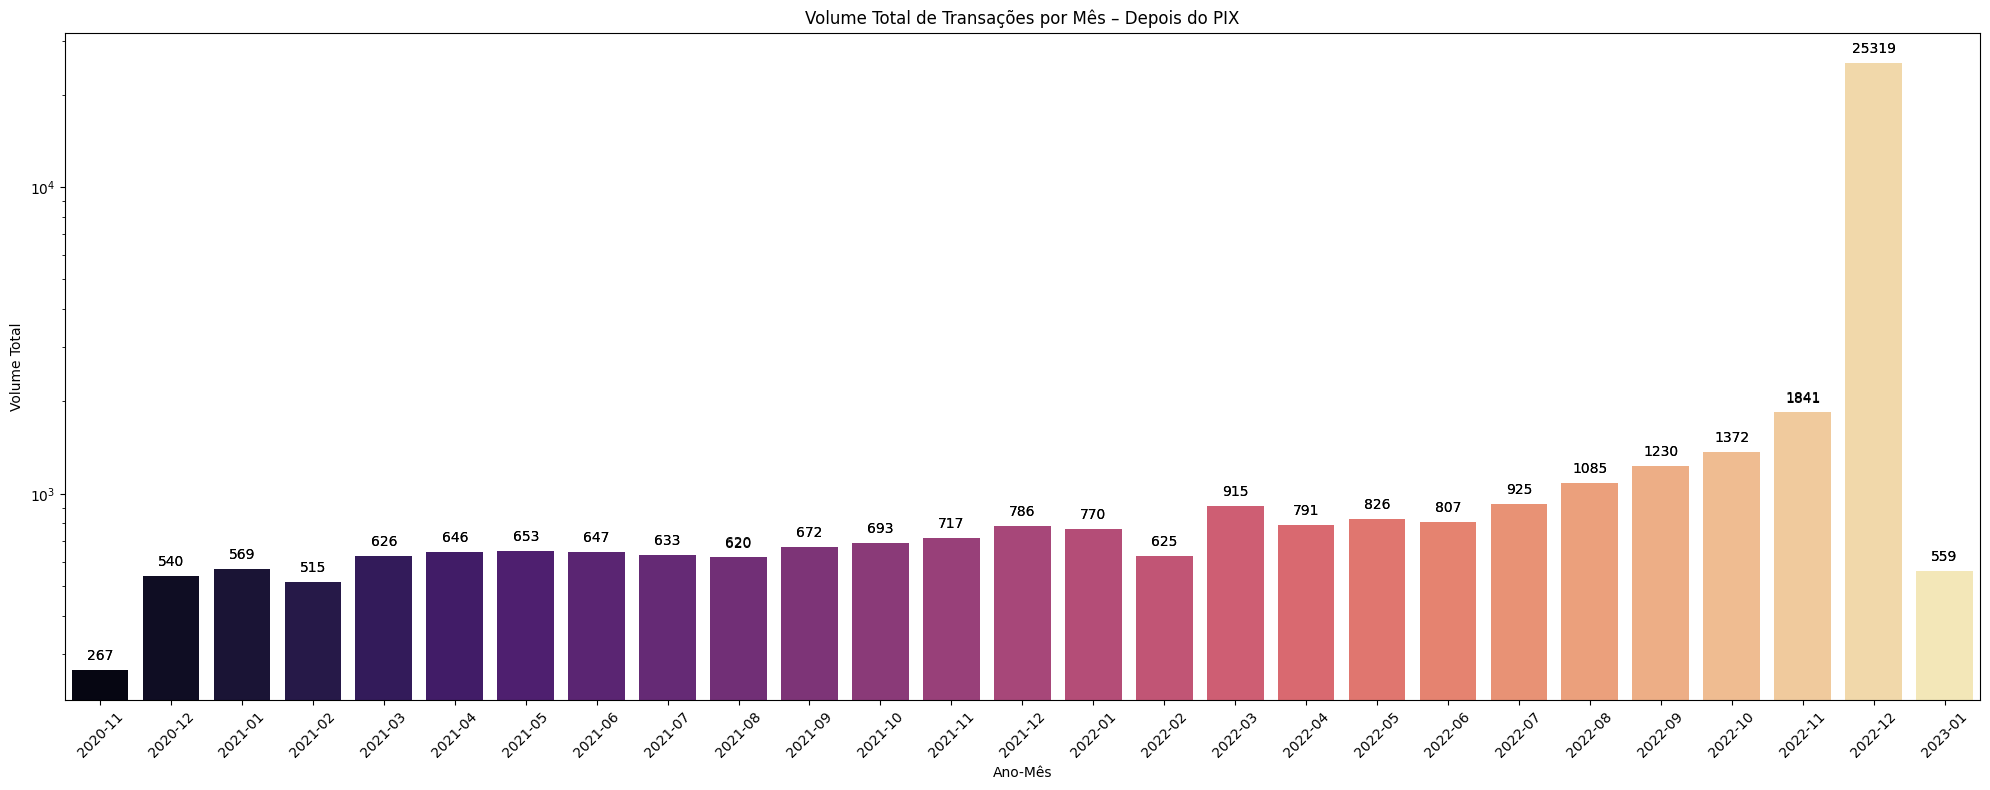

In [ ]:
# Criação de uma nova coluna no dataframe que seja referente aos meses, e agrupamento dos dados por mês para aumentar a granulação
df_depois_pix_copy = df_depois_pix.copy()  # Crie uma cópia do DataFrame

df_depois_pix_copy['ano_mes'] = df_depois_pix_copy['data_transacao'].dt.to_period('M')

df_mensal = df_depois_pix_copy.groupby('ano_mes').size().reset_index(name='volume_total_mensal')

# Função para geração de rótulos que facilitem a leitura das barras do gráfico
def add_labels(ax, spacing=5):
    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        space = spacing
        va = 'bottom'

        if y_value < 0:
            space *= -1
            va = 'top'

        label = "{:.0f}".format(y_value)

        ax.annotate(
            label,
            (x_value, y_value),
            xytext=(0, space),
            textcoords="offset points",
            ha='center',
            va=va
        )

# Configurações do gráfico – volume total por mês
plt.figure(figsize=(20, 8))
ax = sns.barplot(data=df_mensal, x='ano_mes', y='volume_total_mensal', hue='ano_mes', palette='magma')
plt.yscale('log')
plt.title('Volume Total de Transações por Mês – Depois do PIX')
plt.xlabel('Ano-Mês')
plt.ylabel('Volume Total')
plt.xticks(rotation=45)

# Etapas para a adição de rótulos às barras
add_labels(ax)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

**Possíveis tendências observadas:**

* É evidente que volume total de transações bancárias após a implementação do Pix apresenta padrões sazonais, com um aumento significativo durante os meses de dezembro e janeiro. Esses padrões sazonais podem ser explicados pelo aumento na demanda por transações durante as festas de fim de ano e o início do ano novo, quando as pessoas realizam compras de presentes, pagamentos de contas e outras despesas relacionadas a eventos especiais. Depois desses meses, é comum observar que a curva de crescimento se torna ainda maior, e isso nos faz questionar se esses meses também são responsáveis por aumentar o número de clientes do banco.
*  Como é possível observar, o mês de dezembro de 2022 apresenta um aumento significativo no volume total de transações. Isso interfere diretamente nos dados gerais do ano, o que responde a indagação anterior acerca de um crescimento contínuo e linear – que, nesse caso, não foi o que aconteceu.
* O gráfico de volume de transações mensais, relacionado com os dados anteriores do período antes do PIX, sugerem que ele tem sido bem-sucedido em promover a inclusão financeira e acesso a finanças para uma ampla gama de pessoas. Esse aumento também indica a adoção bem-sucedida de pagamentos digitais, o que pode ter implicações positivas para a economia e a sociedade. No entanto, é importante considerar que o aumento no volume de transações pode ser influenciado por fatores como a temporada ou eventos especiais, como o Natal e o Ano Novo.
* Considerando que houve 559 transações nos primeiros 15 dias de janeiro de 2023, o que corresponde a 72,6% do valor do mesmo período no ano anterior, a preocupação anteriormente expressa em relação a esse mês pode ser dissipada. Embora o mês de dezembro de 2022 tenha superado as expectativas, janeiro de 2023 ainda demonstra um crescimento seguro em relação ao padrão estabelecido anteriormente.


**Comportamentos dos clientes:**
3. Quais são as características distintivas dos clientes mais rentáveis?

3.1. Definição de rentabilidade: Para esse cenário específico, estaremos considerando rentabilidade como o volume de receitas geradas por esse cliente.

In [ ]:
# Criação do novo dataframe para analisar a rentabilidade dos clientes do BanVic
df_sort_copy = df_sort.copy()

# Cópia do dataframe e distinção das transações entre receitas ou despesas
df_sort_copy['natureza_transacao'] = np.where(df_sort_copy['valor_transacao'] >= 0, 'receita', 'despesa')

# Agrupamento das transações em um novo dataframe, filtro para que só sejam guardadas as receitas e renomeação das colunas
df_receitas = df_sort_copy.groupby(['num_conta', 'natureza_transacao'])['valor_transacao'].sum().reset_index()
df_receitas = df_receitas[df_receitas['natureza_transacao'] == 'receita']
df_receitas = df_receitas.rename(columns={'nome_transacao': 'natureza_transacao'})
df_receitas = df_receitas.rename(columns={'valor_transacao': 'receita_total'})

df_receitas.tail()

,num_conta,natureza_transacao,receita_total
1989,995,receita,3772.10
1991,996,receita,53729.97
1993,997,receita,5712.43
1995,998,receita,54309.80
1997,999,receita,43056.27


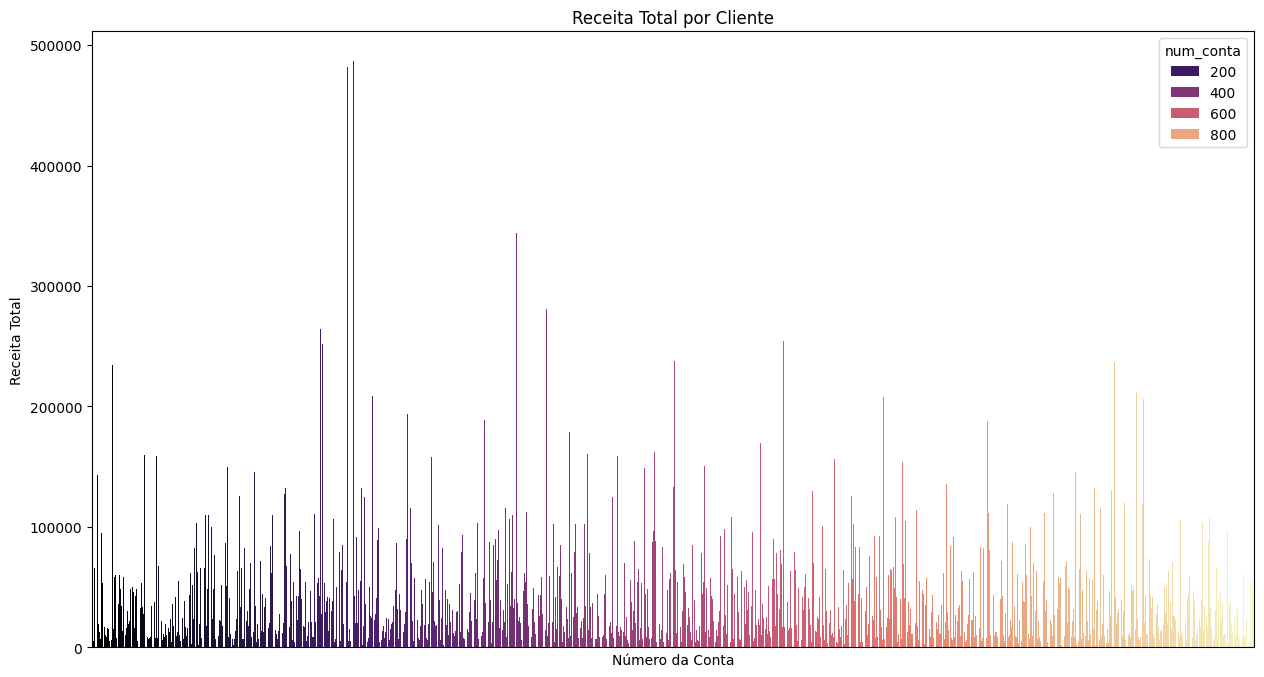

In [ ]:
# Gráfico de rentabilidade

# Gráfico – Rentabilidade dos clientes
plt.figure(figsize=(15, 8))
ax = sns.barplot(y='receita_total', x='num_conta', data=df_receitas, hue='num_conta', palette='magma')
plt.title('Receita Total por Cliente')
plt.ylabel('Receita Total')
plt.xlabel('Número da Conta')
ax.set_xticks([])

plt.show()

Por meio da representação visual, é possível perceber os diferentes níveis de geração de receita que os clientes do BanVic têm gerado. Porém, para uma análise mais detalhada, faz-se necessário diminuir o escopo. Por isso, vamos considerar os 50 clientes mais rentáveis.

In [ ]:
# Ordenação pelo valor da receita para identificarmos os 50 mais rentáveis
df_receitas_sort = df_receitas.sort_values(by='receita_total', ascending=False)

df_receitas_sort.tail(50)

Agora, vamos considerar as características demográficas desses clientes. Para isso, precisamos primeiro acessar as contas mais rentáveis e, a partir delas, identificar os clientes mais rentáveis.

In [ ]:
contas_rentaveis = df_receitas_sort['num_conta']

df_rentaveis = df2[df2['num_conta'].isin(contas_rentaveis)]

df_rentaveis_ordered = df_rentaveis.set_index('num_conta').reindex(contas_rentaveis).reset_index()

df_rentaveis_ordered.head(50)


Para melhor visualização dos clientes mais rentáveis, o gráfico a seguir tem como objetivo mostrar as variações de nível entre as receitas deles.

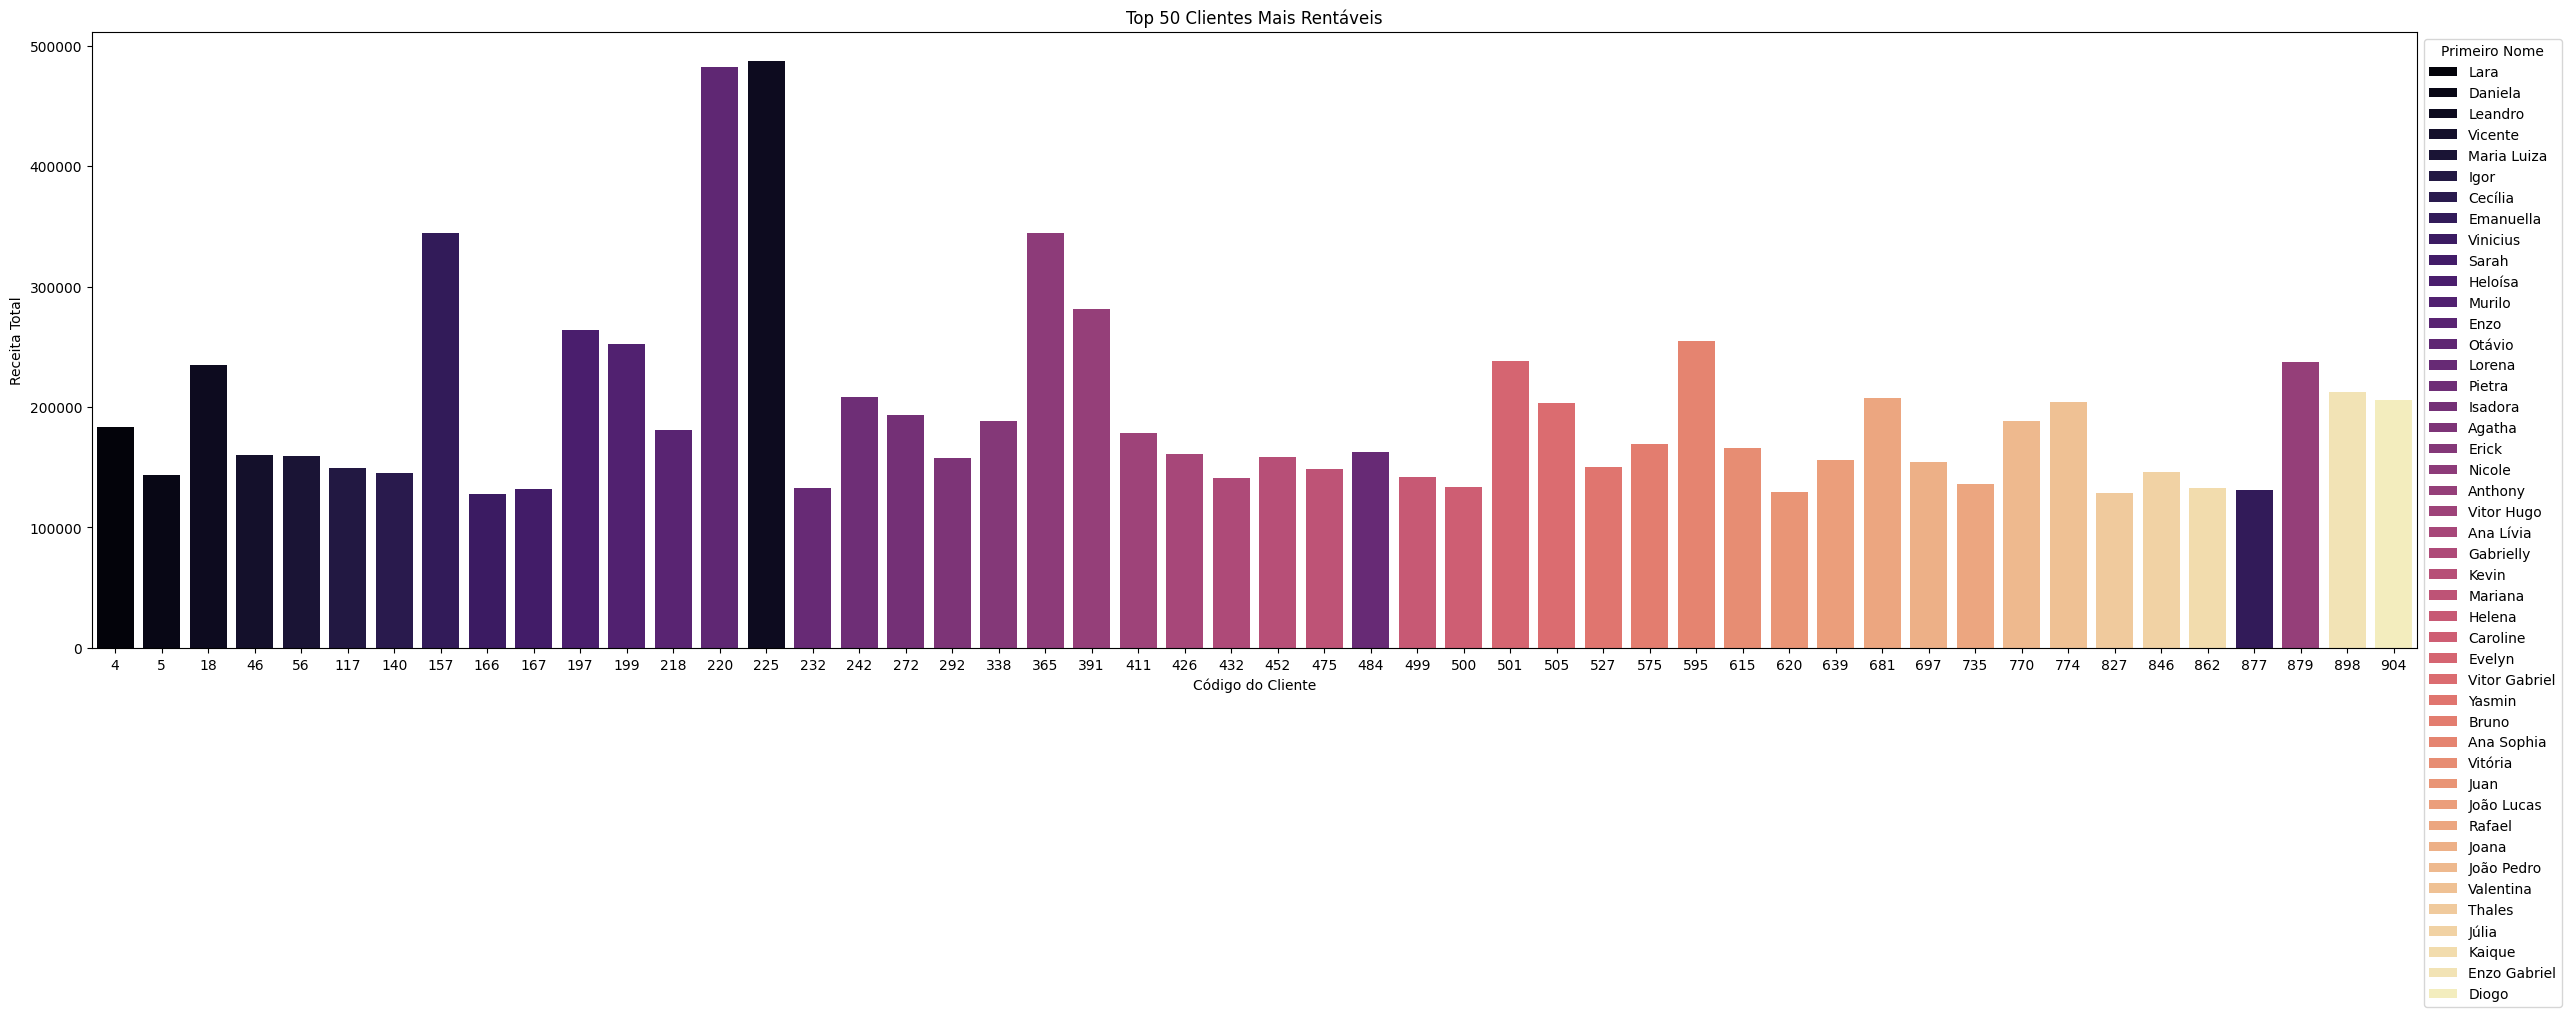

In [ ]:
contas_rentaveis = df_receitas_sort['num_conta']
df_rentaveis_ordered = df_rentaveis_ordered.set_index('num_conta').reindex(contas_rentaveis).reset_index()

df_combined = df_receitas_sort.merge(df_rentaveis_ordered, on='num_conta').merge(df3, on='cod_cliente').merge(df4, on='cod_agencia')

top_50_clientes = df_combined.nlargest(50, 'receita_total')

plt.figure(figsize=(30, 8))
sns.barplot(y='receita_total',  x='cod_cliente', hue='primeiro_nome', data=top_50_clientes, palette='magma')
plt.title('Top 50 Clientes Mais Rentáveis')
plt.ylabel('Receita Total')
plt.xlabel('Código do Cliente')
plt.legend(title='Primeiro Nome', bbox_to_anchor=(1, 1))
plt.show()

Com base no novo dataframe, faremos a análise demográfica desse grupo de clientes, separando-os por cidade, estado, tipo de agência, tipo de cliente, data de inclusão e data de nascimento.

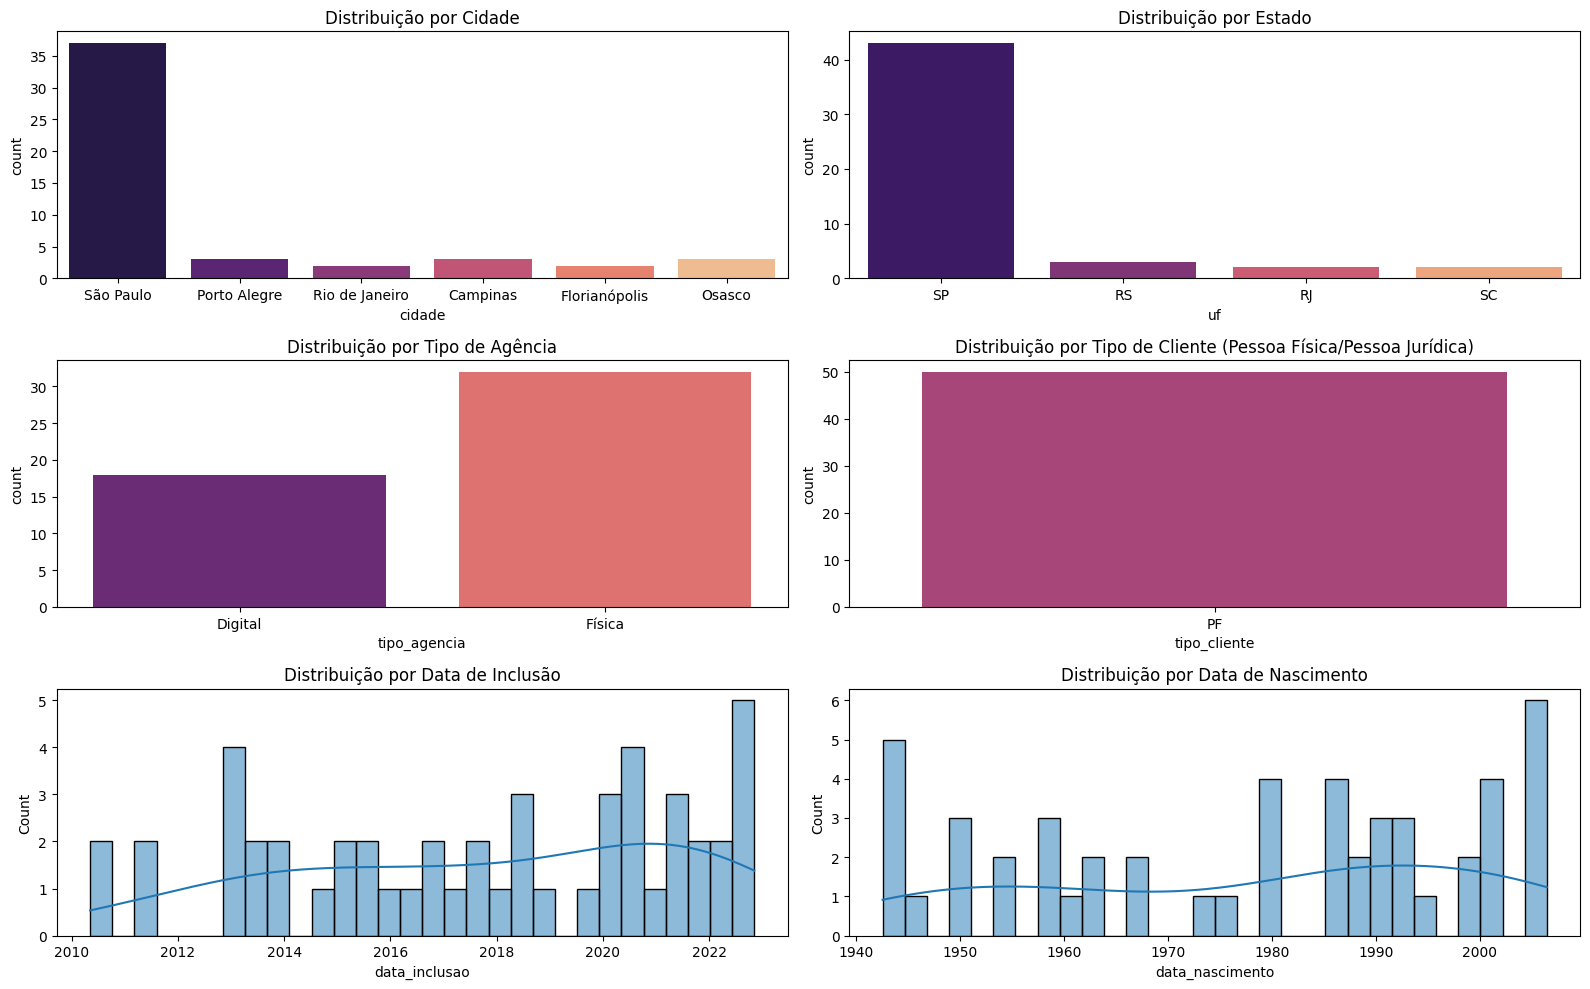

In [ ]:
df_combined = df_receitas_sort.merge(df_rentaveis_ordered, on='num_conta').merge(df3, on='cod_cliente').merge(df4, on='cod_agencia')

# Filtro de clientes mais rentáveis
top_clientes = df_combined.nlargest(50, 'receita_total')

# Gráficos da análise: cidade, estado, tipo de agência, tipo de cliente, data de inclusão e data de nascimento
plt.figure(figsize=(16, 10))
plt.subplot(3, 2, 1)
sns.countplot(x='cidade', data=top_clientes, hue='cidade', palette='magma')
plt.title('Distribuição por Cidade')

plt.subplot(3, 2, 2)
sns.countplot(x='uf', data=top_clientes, hue='uf', palette='magma')
plt.title('Distribuição por Estado')

plt.subplot(3, 2, 3)
sns.countplot(x='tipo_agencia', data=top_clientes, hue='tipo_agencia', palette='magma')
plt.title('Distribuição por Tipo de Agência')

plt.subplot(3, 2, 4)
sns.countplot(x='tipo_cliente', data=top_clientes, hue='tipo_cliente', palette='magma')
plt.title('Distribuição por Tipo de Cliente (Pessoa Física/Pessoa Jurídica)')

plt.subplot(3, 2, 5)
top_clientes['data_inclusao'] = pd.to_datetime(top_clientes['data_inclusao'])
sns.histplot(x='data_inclusao', data=top_clientes, kde=True, bins=30)
plt.title('Distribuição por Data de Inclusão')

plt.subplot(3, 2, 6)
top_clientes['data_nascimento'] = pd.to_datetime(top_clientes['data_nascimento'])
sns.histplot(x='data_nascimento', data=top_clientes, kde=True, bins=30)
plt.title('Distribuição por Data de Nascimento')

plt.tight_layout()
plt.show()

Considerações acerca da análise demográfica:
* A maior concentração de clientes, a nível municipal e estadual, é em São Paulo. Porém, alguns fatores influenciam esse resultado como, por exemplo, o fato de existirem três agências (1, 2, 7, esta última digital) na cidade de São Paulo e cinco no estado de São Paulo.
* Ao analisarmos o tipo de agência, observamos uma predominância numérica de clientes vinculados às agências físicas. No entanto, é crucial notar que, apesar de haver apenas uma agência digital, a proporção de clientes provenientes dessa agência ultrapassa 50% da soma total dos clientes das agências físicas. Este dado indica que a maior concentração de clientes rentáveis está associada à agência digital, ressaltando sua importância estratégica no panorama geral.
* Todos os clientes observados são Pessoa Física. Isso revela que o BanVic reafirma seu compromisso em manter uma relação direta com os clientes, fornecendo uma abordagem mais centrada em suas necessidades e interesses.
* Em relação à data de inclusão, a distribuição dos clientes mais rentáveis revela padrões significativos. No intervalo de 2010 a 2012, identificamos a inclusão de 4 clientes destacados. Entre 2012 e 2014, esse número cresce para 8 clientes, mantendo uma tendência ascendente. No período subsequente de 2014 a 2016, observamos a adição de 6 clientes notáveis. Entre 2016 e 2018, esse número aumenta para 7 clientes, indicando uma continuidade na atração de clientes estratégicos. E entre 2018 e 2020, a inclusão é de 5 dos clientes mais rentáveis.

> No entanto, a análise revela um cenário extraordinário a partir da introdução do PIX como marco temporal. No intervalo de 2020 a 2023, foi registrado a entrada impressionante de 20 dos clientes mais rentáveis. Esse dado enfatiza a notável influência do PIX e destaca a importância de oferecer soluções financeiras inovadoras, proporcionando aos clientes uma liberdade financeira que ressoa de forma marcante no cenário atual.

* Ao analisar as datas de nascimento dos clientes, é possível identificar distintos intervalos entre as décadas que refletem a diversidade etária na base de clientes:

> Década de 1940 a 1950: 9 clientes.

> Década de 1950 a 1960: 5 clientes.

> Década de 1960 a 1970: 5 clientes.

> Década de 1970 a 1980: 6 clientes.

> Década de 1980 a 1990: 6 clientes.

> Década de 1990 a 2000: 9 clientes.

> A partir de 2000: 10 clientes.

> A distribuição etária indica uma clientela com representação em diversas faixas etárias, sugerindo a importância de estratégias segmentadas para atender às diferentes necessidades e preferências de cada grupo. O destaque notável é o protagonismo das últimas gerações, evidenciado pela rápida ascensão à condição de clientes rentáveis em menos tempo.




**As agências do BanVic:**
4. Que métricas podem ser usadas para medir a aceitação ou reconhecimento de cada agência? E como isso se diferencia em relação à agência digital ou física?

> Antes de qualquer coisa, podemos considerar que o BanVic tem dez agências, e estas são:

In [ ]:
df4.head(10)

,cod_agencia,nome,endereco,cidade,uf,data_abertura,tipo_agencia
0,7,Agência Digital,"Av. Paulista, 1436 - Cerqueira César, São Paul...",São Paulo,SP,2015-08-01,Digital
1,1,Agência Matriz,"Av. Paulista, 1436 - Cerqueira César, São Paul...",São Paulo,SP,2010-01-01,Física
2,2,Agência Tatuapé,"Praça Sílvio Romero, 158 - Tatuapé, São Paulo ...",São Paulo,SP,2010-06-14,Física
3,3,Agência Campinas,"Av. Francisco Glicério, 895 - Vila Lidia, Camp...",Campinas,SP,2012-03-04,Física
4,4,Agência Osasco,"Av. Antônio Carlos Costa, 1000 - Bela Vista, O...",Osasco,SP,2013-11-06,Física
5,5,Agência Porto Alegre,"Av. Bento Gonçalves, 1924 - Partenon, Porto Al...",Porto Alegre,RS,2013-12-01,Física
6,6,Agência Rio de Janeiro,"R. Sen. Dantas, 15 - Centro, Rio de Janeiro - ...",Rio de Janeiro,RJ,2015-04-01,Física
7,8,Agência Jardins,"Av. Brg. Faria Lima, 2491 - Jardim Paulistano,...",São Paulo,SP,2018-01-09,Física
8,9,Agência Florianópolis,"Av. Jorn. Rubéns de Arruda Ramos, 1280 - Centr...",Florianópolis,SC,2019-10-09,Física
9,10,Agência Recife,"Av. Conselheiro Aguiar, 4432 - Boa Viagem, Rec...",Recife,PE,2021-10-09,Física


Para estruturar a análise, foram considerados os aspectos: cidade e estado em que a agência se localiza, quantidade de clientes por agência e por tipo de agência.

Para isso, primeiro é preciso um dataframe que contém somente essas informações. Em seguida, serão plotados os gráficos separando cada cenário. A seguir, estarão as considerações sobre os visualizadores.

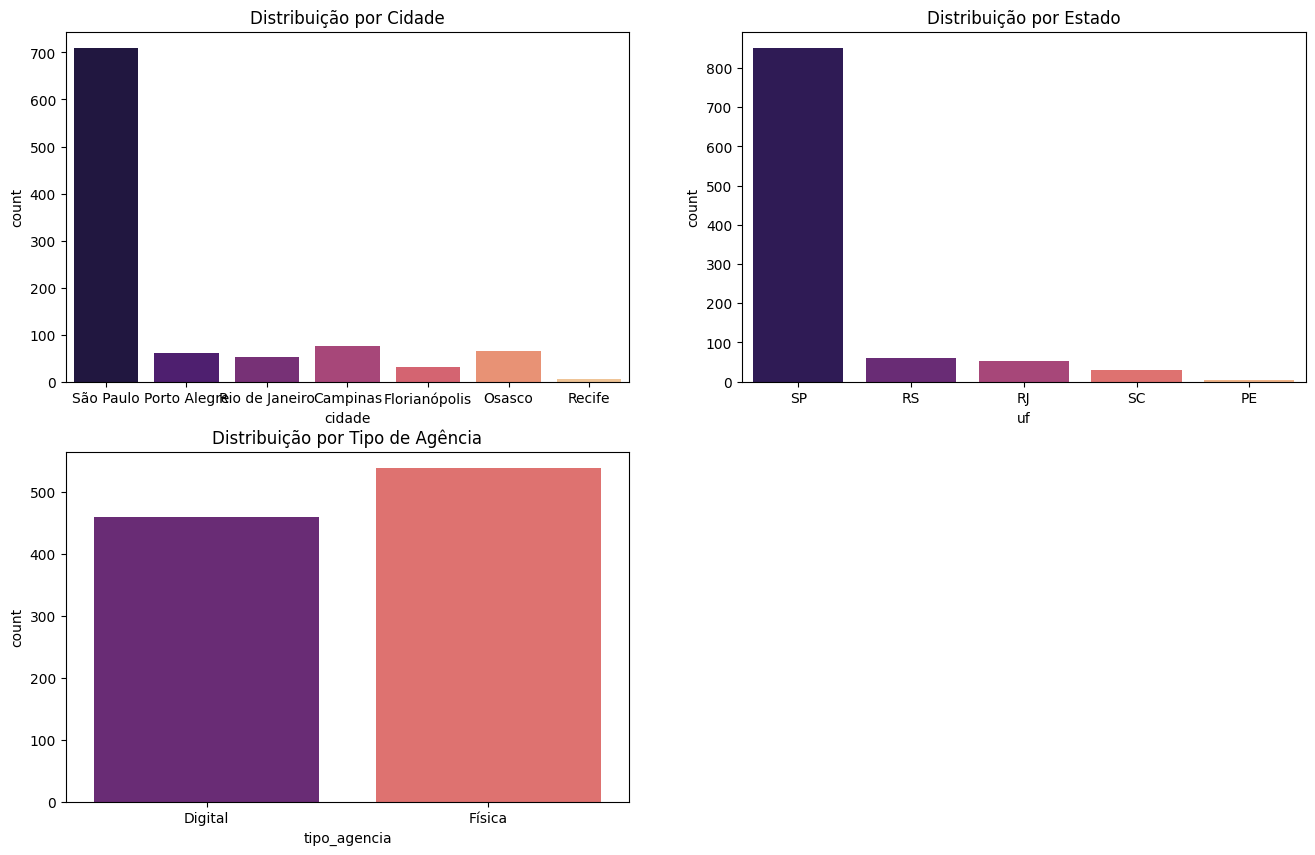

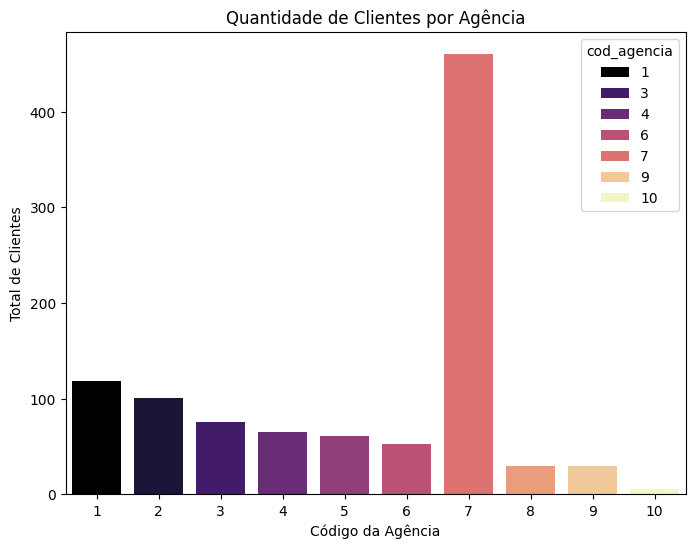

<Figure size 640x480 with 0 Axes>

In [ ]:
df_agencias = df_combined[['cidade', 'uf', 'primeiro_nome', 'tipo_agencia']]

plt.figure(figsize=(16, 10))

# Análise demográfica por cidade, estado, e quantidade de clientes por agência e por tipo de agência
plt.subplot(2, 2, 1)
sns.countplot(x='cidade', data=df_agencias, hue='cidade', palette='magma')
plt.title('Distribuição por Cidade')

plt.subplot(2, 2, 2)
sns.countplot(x='uf', data=df_agencias, hue='uf', palette='magma')
plt.title('Distribuição por Estado')

plt.subplot(2, 2, 3)
sns.countplot(x='tipo_agencia', data=df_agencias, hue='tipo_agencia', palette='magma')
plt.title('Distribuição por Tipo de Agência')

df_total_clientes = df_combined.groupby('cod_agencia')['primeiro_nome'].count().reset_index(name='total_clientes')
plt.figure(figsize=(8, 6))
sns.barplot(x='cod_agencia', y='total_clientes', data=df_total_clientes, hue='cod_agencia', palette='magma')
plt.title('Quantidade de Clientes por Agência')
plt.xlabel('Código da Agência')
plt.ylabel('Total de Clientes')
plt.show()

plt.tight_layout()
plt.show()

Considerações sobre métricas para mensurar a popularidade de cada agência:
1. Cidade: São Paulo mantém sua posição como a cidade com o maior número de contas, impulsionada pela presença das três agências locais. Campinas e Osasco seguem, possivelmente beneficiadas por serem as primeiras agências do BanVic, influenciando significativamente seus números de adesão.
2. Estado: O estado de São Paulo lidera, alinhado com a predominância das três cidades com mais clientes por agências. Essa constatação sugere a importância de estratégias específicas para promover o aumento de números nas demais agências, diversificando a presença geográfica.
3. Tipo de Agência: A disparidade entre as nove agências físicas e a única agência digital é evidente, refletindo no maior número de clientes nas agências físicas. Contudo, é crucial destacar a notável relevância da agência digital, cujo número de clientes se aproxima significativamente da soma de todas as agências físicas. Esse destaque ressalta a importância estratégica da agência digital, apontando para um considerável potencial de crescimento nesse formato. Essa observação enfatiza a necessidade de abordagens estratégicas distintas para cada tipo de agência.
4. Quantidade de Clientes por Agência: A agência digital (7) se destaca como a mais popular, superando as agências físicas em número de clientes. A agência 1, a pioneira, mantém uma posição forte, enquanto a agência 10, recentemente estabelecida em Recife, está em processo de difusão, apresentando o menor número de clientes. Essa análise proporciona insights valiosos para ajustar estratégias e promover o crescimento equilibrado em todas as agências.